In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pylab import rcParams, margins

In [2]:
from tokenizer import lexer
from parser import parser, log
from collections import defaultdict

In [3]:
def draw(pattern):
    root = parser.parse(pattern, debug=log, lexer=lexer)
    G = nx.DiGraph()
    stack = [root]
    ids = {}
    c = 0
    
    while stack:
        node = stack.pop()
        if node not in ids:
            c += 1
            ids[node] = c
            
        for child in node.children:
            if child:
                if child not in ids:
                    c += 1
                    ids[child] = c
                    
                G.add_edge(f'({ids[node]}) {node.type}: {node.value}', f'({ids[child]}) {child.type}: {child.value}')
                stack.append(child)
    rcParams['figure.figsize'] = 20, 10
    margins(x=0.1, y=0.05)
    pos=graphviz_layout(G, prog='dot')
    nx.draw(G, pos=pos,
        node_color='lightgreen', 
        node_size=2000,
        with_labels=True, 
        arrows=False)

/home/carter/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


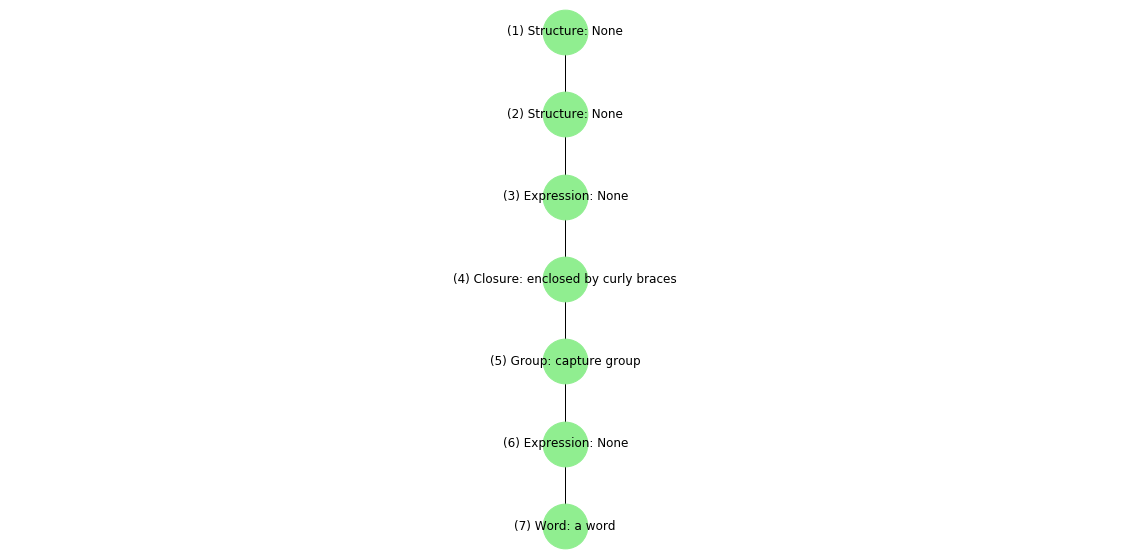

In [4]:
pattern = '{(\w+)}'
draw(pattern)

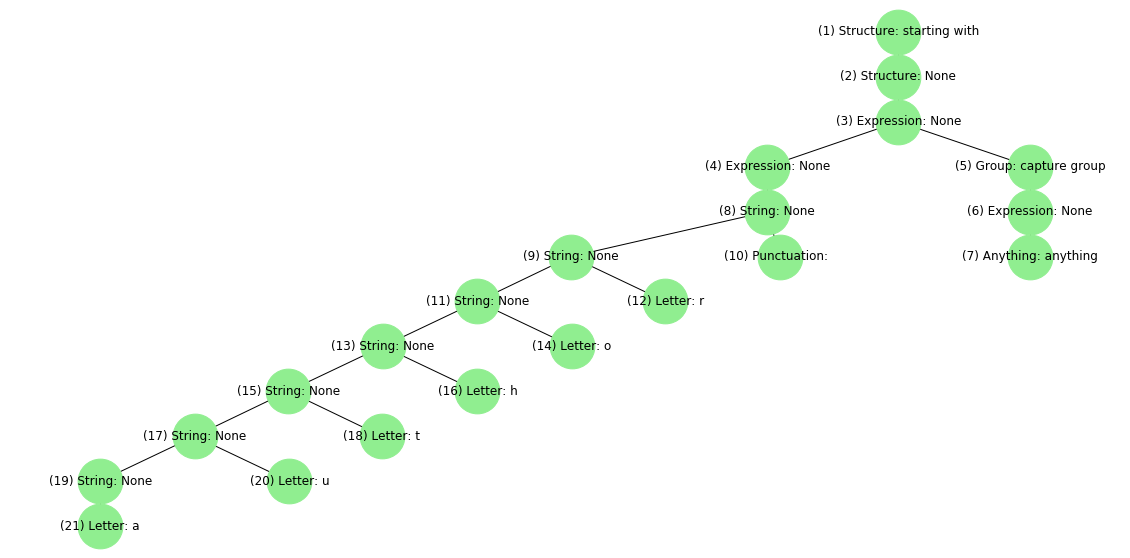

In [5]:
pattern = '^author (.*)'
draw(pattern)

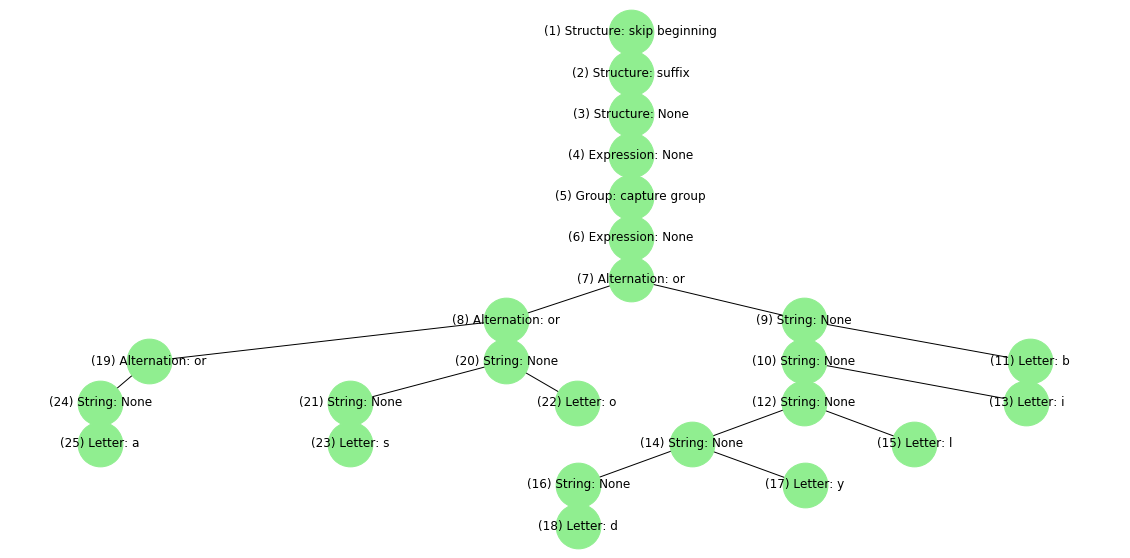

In [6]:
pattern = '.*\.(a|so|dylib)$'
draw(pattern)

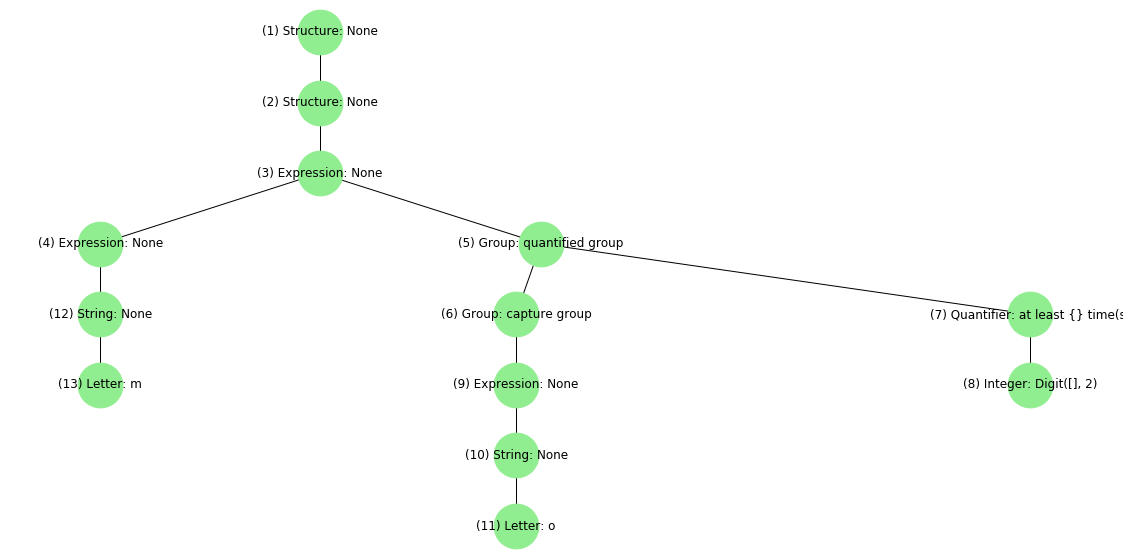

In [7]:
pattern = 'm(o){2,}'
draw(pattern)